In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# a. Data Loading
### The dataset is loaded using pandas, allowing us to work with structured data efficiently.

In [2]:
df = pd.read_csv("student-mat.csv")

### Display the first few rows

In [3]:
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# b. Data Exploration
### Checking for missing values
### Missing values can impact our analysis, so we check for them in the dataset.

In [4]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


### Display column data types
### Understanding data types helps in selecting appropriate analysis techniques.

In [5]:
print("\nData Types:\n", df.dtypes)


Data Types:
 school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


### Understand dataset size
### The shape function provides the number of rows and columns in the dataset.

In [6]:
print("\nDataset Size:", df.shape)


Dataset Size: (395, 33)


# c. Data Cleaning
### Handle missing values (if any)
### We replace missing values with the median of respective columns to maintain data consistency.

In [7]:
df.fillna(df.median(), inplace=True)

C:\Users\charitha\AppData\Local\Temp\ipykernel_21508\3604797450.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


### Remove duplicate entries
### Duplicate data can skew our analysis, so we remove any repeated records.

In [8]:
df.drop_duplicates(inplace=True)

# d. Data Analysis Questions
### 1. Calculate the average score in math (G3)
### We compute the mean of the final grade column to understand the overall performance.

In [9]:
avg_g3 = df['G3'].mean()
print("\nAverage Final Grade (G3):", avg_g3)


Average Final Grade (G3): 10.415189873417722


### 2. Count students who scored above 15 in G3
### This helps identify high-performing students in the dataset.

In [10]:
high_scorers = (df['G3'] > 15).sum()
print("\nStudents Scoring Above 15 in G3:", high_scorers)


Students Scoring Above 15 in G3: 40


### 3. Correlation between study time and final grade
### We calculate Pearson correlation to determine the relationship between study time and final grades.

In [11]:
correlation = df['studytime'].corr(df['G3'])
print("\nCorrelation between Study Time and G3:", correlation)


Correlation between Study Time and G3: 0.09781968965319635


### 4. Gender-based average final grade
### This allows us to compare academic performance across different genders.

In [12]:
avg_g3_gender = df.groupby('sex')['G3'].mean()
print("\nAverage G3 by Gender:\n", avg_g3_gender)


Average G3 by Gender:
 sex
F     9.966346
M    10.914439
Name: G3, dtype: float64


# e. Data Visualization
### 1. Histogram of final grades

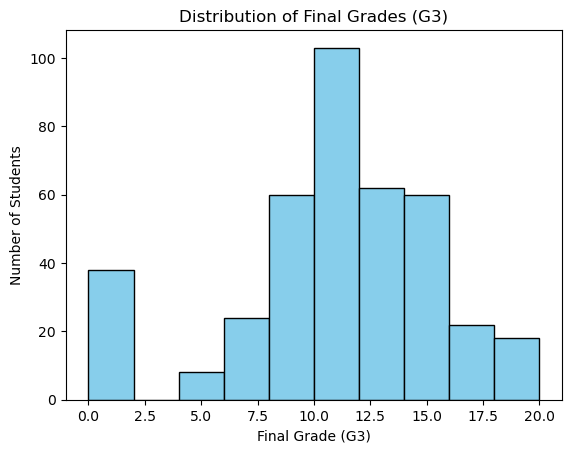

In [13]:
plt.hist(df["G3"], bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Final Grade (G3)")
plt.ylabel("Number of Students")
plt.title("Distribution of Final Grades (G3)")
plt.show()

 ### 2. Scatter plot of study time vs final grade

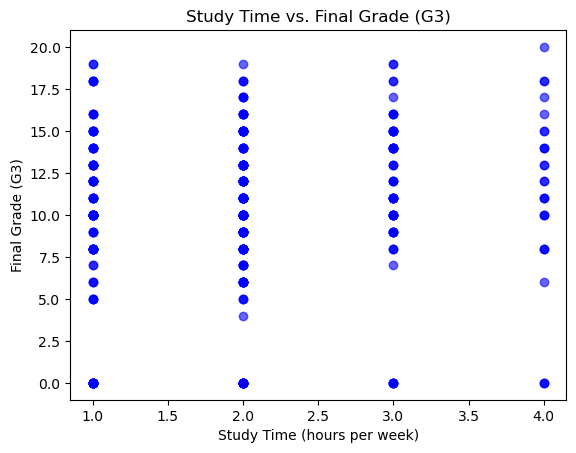

In [14]:
plt.scatter(df["studytime"], df["G3"], color="Blue", alpha=0.6)
plt.xlabel("Study Time (hours per week)")
plt.ylabel("Final Grade (G3)")
plt.title("Study Time vs. Final Grade (G3)")
plt.show()

### 3. Bar chart of average scores by gender

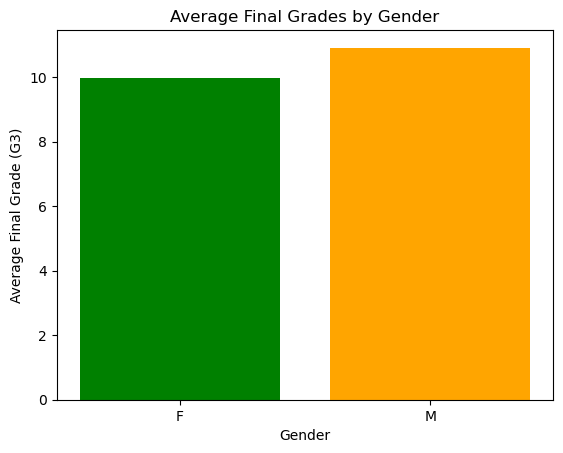

In [15]:
avg_scores = df.groupby("sex")["G3"].mean()
plt.bar(avg_scores.index, avg_scores, color=["green", "orange"])
plt.xlabel("Gender")
plt.ylabel("Average Final Grade (G3)")
plt.title("Average Final Grades by Gender")
plt.show()